Chapter 19  
# 斐波那契数列曲线
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
# 导入包
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D

In [2]:
# 使用递归函数生成 Fibonacci 数列
def fibonacci(n):
    # 如果 n 小于或等于 1，它将直接返回 n
    if n <= 1:
        return n
    # 否则，它将调用两次自己
    # 并将 n-1 和 n-2 作为参数传递给它们
    else:
        return fibonacci(n-1) + fibonacci(n-2)

## 产生数据

In [3]:
num = 11
idx_array = np.arange(num)

fibonacci_array = np.array([fibonacci(i) for i in range(num)])

In [4]:
fibonacci_array_from_1 = np.array([fibonacci(i) for i in np.arange(1, num + 1)])

In [5]:
x_array = 0 + fibonacci_array_from_1 * (-1) ** (np.floor(idx_array/2) + 2)
x_array = np.insert(x_array, 0, 0)
x_array = np.cumsum(x_array)

In [6]:
y_array = 0 + fibonacci_array_from_1 * (-1) ** (np.floor((1 + idx_array)/2) + 1)
y_array = np.insert(y_array, 0, 0)
y_array = np.cumsum(y_array)

In [7]:
# # 逆时针为正
rotation = (idx_array - 1) * 90

${\displaystyle f(t)=4\left\vert t-\left\lfloor t+3/4\right\rfloor +1/4\right\vert -1}$

https://mathworld.wolfram.com/TriangleWave.html

In [8]:
# t_array = np.linspace(0, 5, 101)
# triangle_wave = 4*np.abs(t_array - np.floor(t_array +3/4) + 1/4) - 1

# fig, ax = plt.subplots(figsize = (8,2))
# ax.plot(t_array, triangle_wave)

# ax.set_xlim(0,5); ax.set_ylim(-1.2, 1.2); 
# ax.spines['bottom'].set_position(('data',0))
# ax.spines['right'].set_color('none')
# ax.spines['top'].set_color('none')

# fig.savefig('Figures/三角波.svg', format='svg')
# plt.show()

In [9]:
x_arc_center = fibonacci_array * (4*np.abs((idx_array - 1)/4 - np.floor((idx_array - 1)/4 + 2/4)) - 1)
# 这一句用到了三角波的变形
x_arc_center = np.cumsum(x_arc_center) + 1
x_arc_center = np.insert(x_arc_center, 0, 1)

In [10]:
triangle_wave = 4*np.abs((idx_array - 1)/4 - np.floor((idx_array - 1)/4 + 2/4)) - 1
triangle_wave = np.insert(triangle_wave, 0, 0)

In [11]:
y_arc_center = fibonacci_array * triangle_wave[:-1]
y_arc_center = np.cumsum(y_arc_center) + 0
y_arc_center = np.insert(y_arc_center, 0, 0)

In [12]:
# 自定义函数，绘制45度弧形
def plot_arc(x_i, y_i, r_i, rotation_i):
    rotation_i = rotation_i/180 * np.pi
    angle_array = np.linspace(rotation_i, 
                              rotation_i + np.pi/2, 
                              101, endpoint = True)
    x_arc_array = r_i * np.cos(angle_array) + x_i
    y_arc_array = r_i * np.sin(angle_array) + y_i
    plt.plot(x_arc_array, y_arc_array, c = 'k')
    

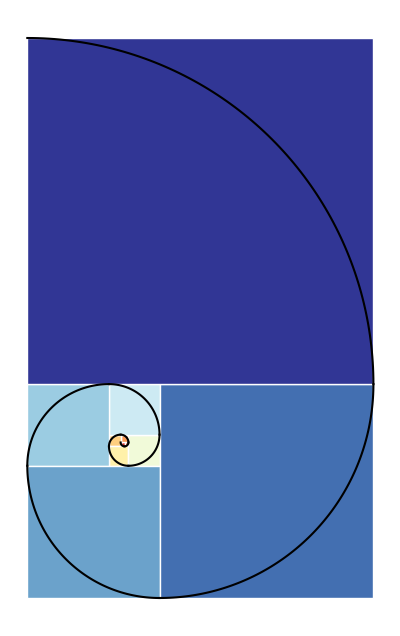

In [13]:
fig, ax = plt.subplots(figsize = (8,8))

colors = plt.cm.RdYlBu(np.linspace(0,1,num + 1))

for i in idx_array:
    rotate_i = rotation[i]
    side_idx = fibonacci_array_from_1[i]
    rec_loc_idx = np.array([x_array[i], y_array[i]]) 

    rec = plt.Rectangle(rec_loc_idx, 
                        width =side_idx, 
                        height=side_idx, 
                        facecolor=colors[i + 1], 
                        edgecolor = 'w',
                        transform=Affine2D().rotate_deg_around(
                           x_array[i], y_array[i], rotate_i) 
                        + ax.transData)
    ax.add_patch(rec)
    # 绘制弧形
    plot_arc(x_arc_center[i], y_arc_center[i], 
             fibonacci_array_from_1[i], 180 + i * 90)

ax.set_aspect('equal')
plt.axis('off')   
plt.show()